This notebook runs the Blip model without fine tuning for the purposes of showing the difference between the results from the base model and the tuned model.

In [1]:
# install Hugging Face transformers library to access pretrained models &
!pip install git+https://github.com/huggingface/transformers.git@main

  Cloning https://github.com/huggingface/transformers.git (to revision main) to /tmp/pip-req-build-b7r12pz8
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-b7r12pz8
  Resolved https://github.com/huggingface/transformers.git to commit 388fd314d8dd6bcb685f5223a7a46caa17e577f2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.37.0.dev0-py3-none-any.whl size=8235197 sha256=c7549e6298688014a150e940e2be746d513d1a814194794dd6efc94cb6f6041a
  Stored in directory: /tmp/pip-ephem-wheel-cache-kbazgqww/wheels/cf/59/82/6492402e887a68975030bf8c06532260abc16abb7ccd8127cc
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [2]:
from transformers import AutoProcessor, BlipForConditionalGeneration
from matplotlib import pyplot as plt
import requests
from PIL import Image

`AnnotionFormat` is deprecated and will be removed in v4.38. Please use `transformers.image_utils.AnnotationFormat` instead.


In [3]:
# Loading model (could take a long time)
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [4]:
# define the processor
processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [5]:
# print the image with the caption
def get_caption(image):
  inputs = processor(images=image, return_tensors='pt')
  pixel_values = inputs.pixel_values

  generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
  generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

  fig = plt.figure(figsize=(18, 14))
  plt.imshow(image)
  plt.title(generated_caption)
  plt.axis('off')
  plt.show()

In [6]:
# test with image not in the dataset

# image of New York (Manhattan)
new_image_url = "https://images.unsplash.com/photo-1532960401447-7dd05bef20b0?q=80&w=3140&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

new_image = Image.open(requests.get(new_image_url, stream=True).raw).convert('RGB')
get_caption(new_image)

Output hidden; open in https://colab.research.google.com to view.

## Test Images for Comparison with Fine-Tuned Model

In [8]:
# test with image not in the dataset, from URL

# image of Philadelphia
new_image_url = "https://images.unsplash.com/photo-1616528279874-b3d3b50ab6c7?q=80&w=2071&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

new_image = Image.open(requests.get(new_image_url, stream=True).raw).convert('RGB')
get_caption(new_image)

Output hidden; open in https://colab.research.google.com to view.

In [9]:
# test with image not in the dataset, from URL

# image of Pittsburgh - does it identify the rivers and bridges?
new_image_url = "https://images.unsplash.com/photo-1555424221-250de2a343ad?q=80&w=2062&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

new_image = Image.open(requests.get(new_image_url, stream=True).raw).convert('RGB')
get_caption(new_image)

Output hidden; open in https://colab.research.google.com to view.

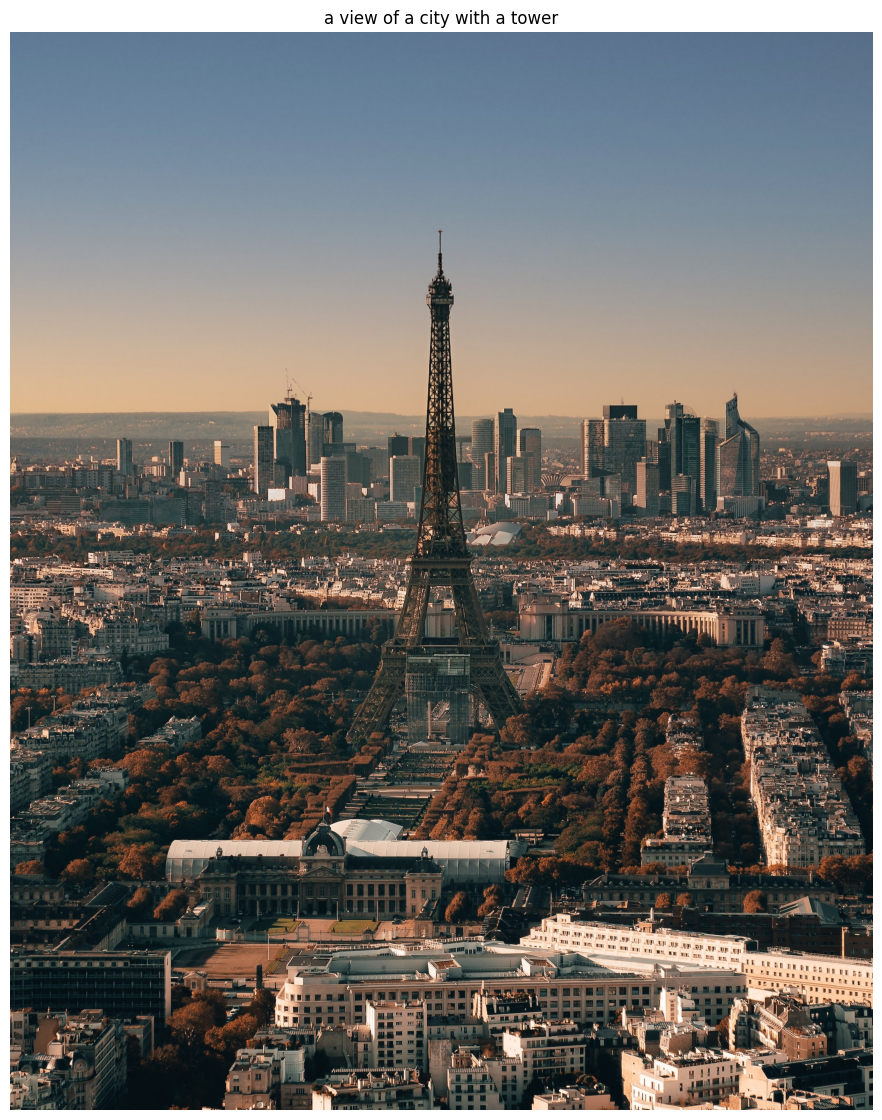

In [10]:
# test with image not in the dataset, from URL

# image of Paris - it should identify the Eiffel Tower
new_image_url = "https://images.unsplash.com/photo-1637329096986-62486d0c4380?q=80&w=1964&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

new_image = Image.open(requests.get(new_image_url, stream=True).raw).convert('RGB')
get_caption(new_image)

In [11]:
# test with image not in the dataset, from URL

# image of Cologne - how does the model do with lesser known landmarks?
new_image_url = "https://images.unsplash.com/photo-1561624485-0e43bcc1836d?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

new_image = Image.open(requests.get(new_image_url, stream=True).raw).convert('RGB')
get_caption(new_image)

Output hidden; open in https://colab.research.google.com to view.

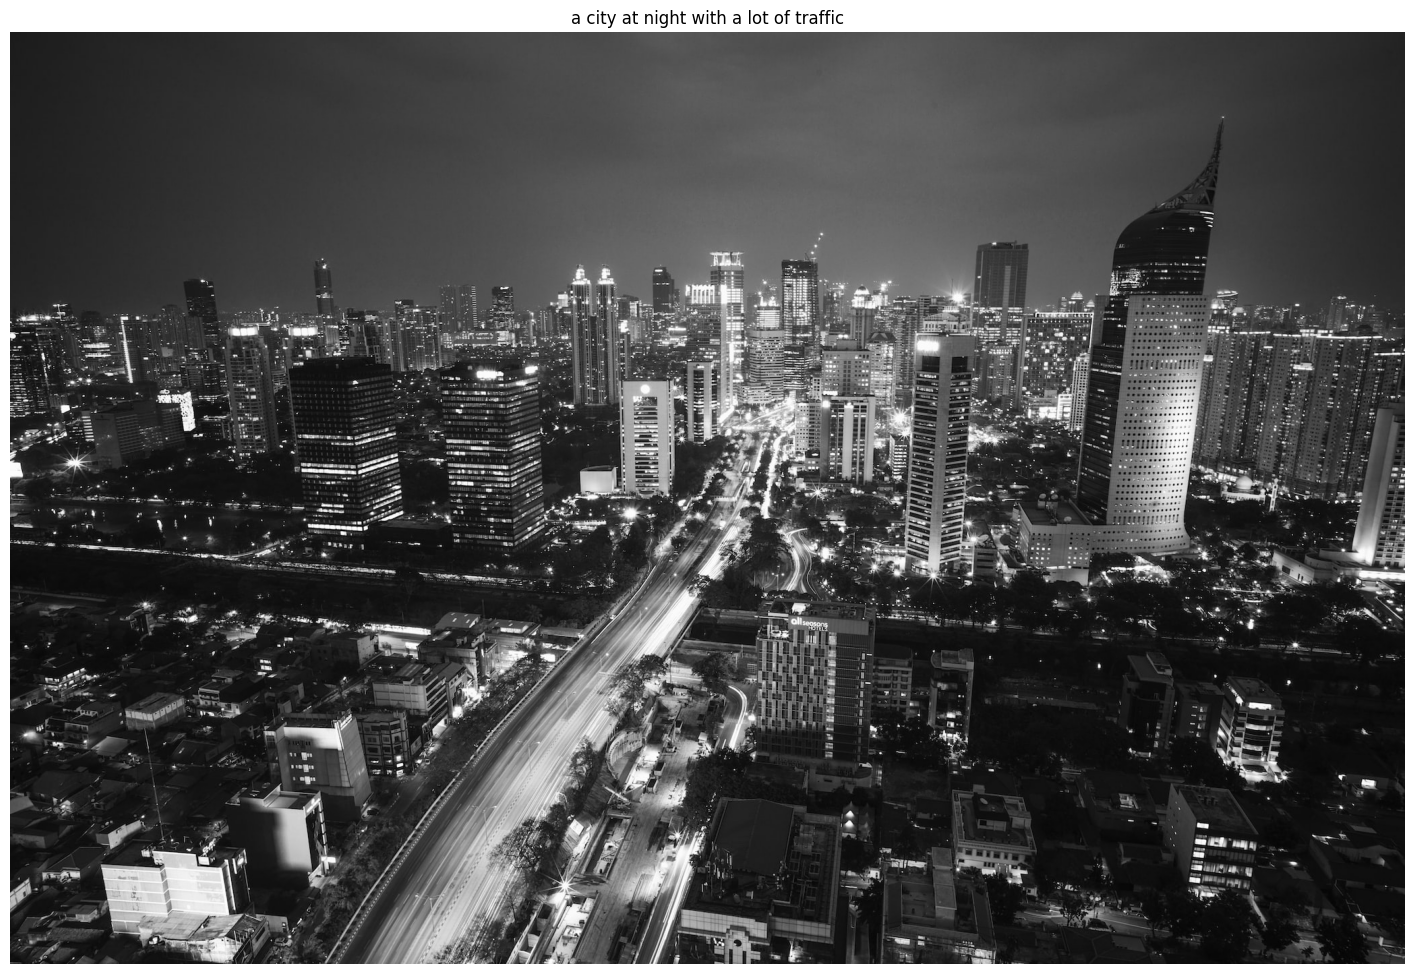

In [12]:
# test with image not in the dataset, from URL

# image of Jakarta, Indonesia (black and white)
new_image_url = "https://images.unsplash.com/photo-1446052377488-d40ee7263458?q=80&w=2069&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

new_image = Image.open(requests.get(new_image_url, stream=True).raw).convert('RGB')
get_caption(new_image)

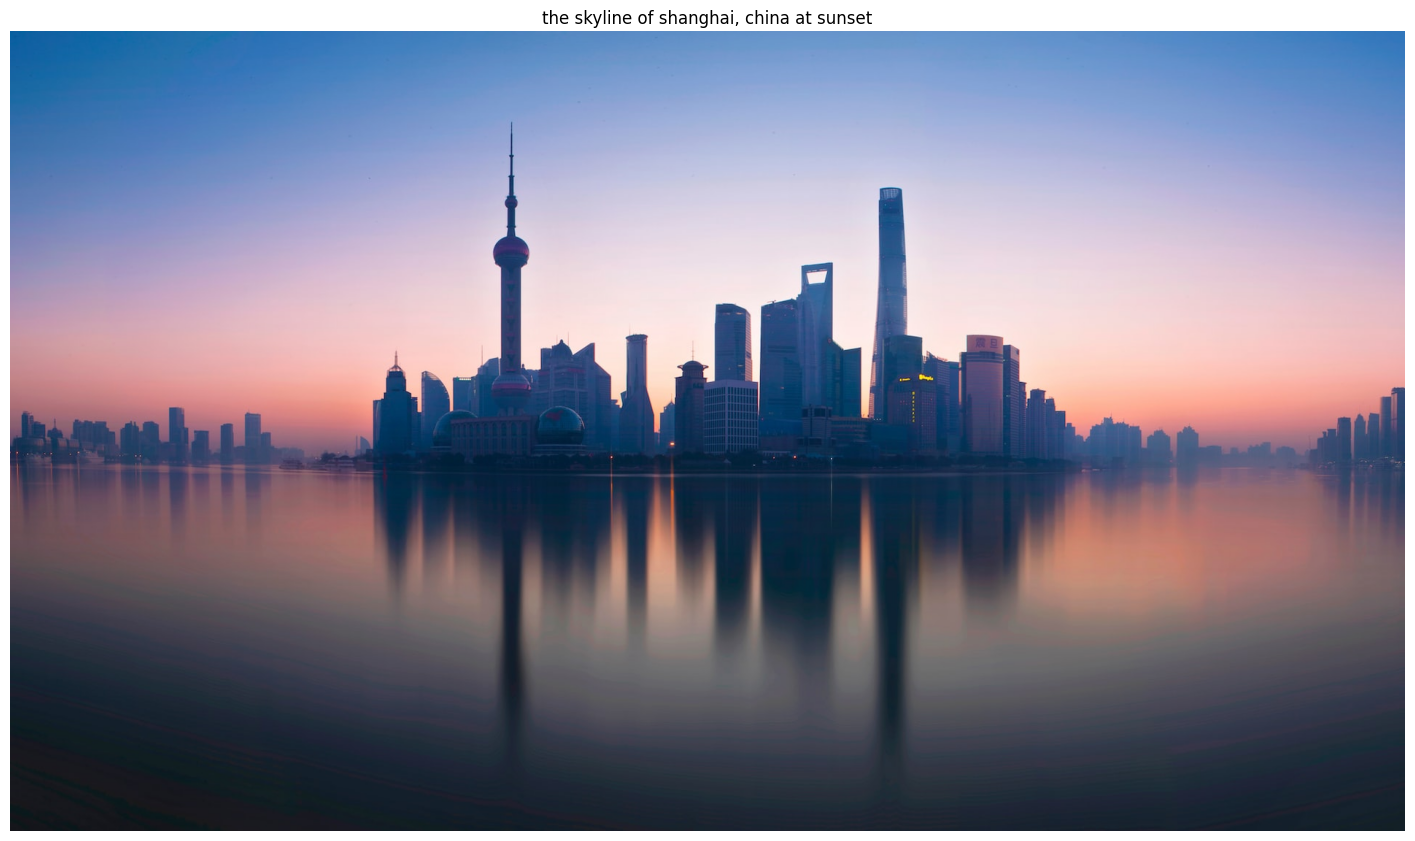

In [13]:
# test with image not in the dataset, from URL

# image of Shanghai (reflection)
new_image_url = "https://images.unsplash.com/photo-1545893835-abaa50cbe628?q=80&w=1912&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

new_image = Image.open(requests.get(new_image_url, stream=True).raw).convert('RGB')
get_caption(new_image)

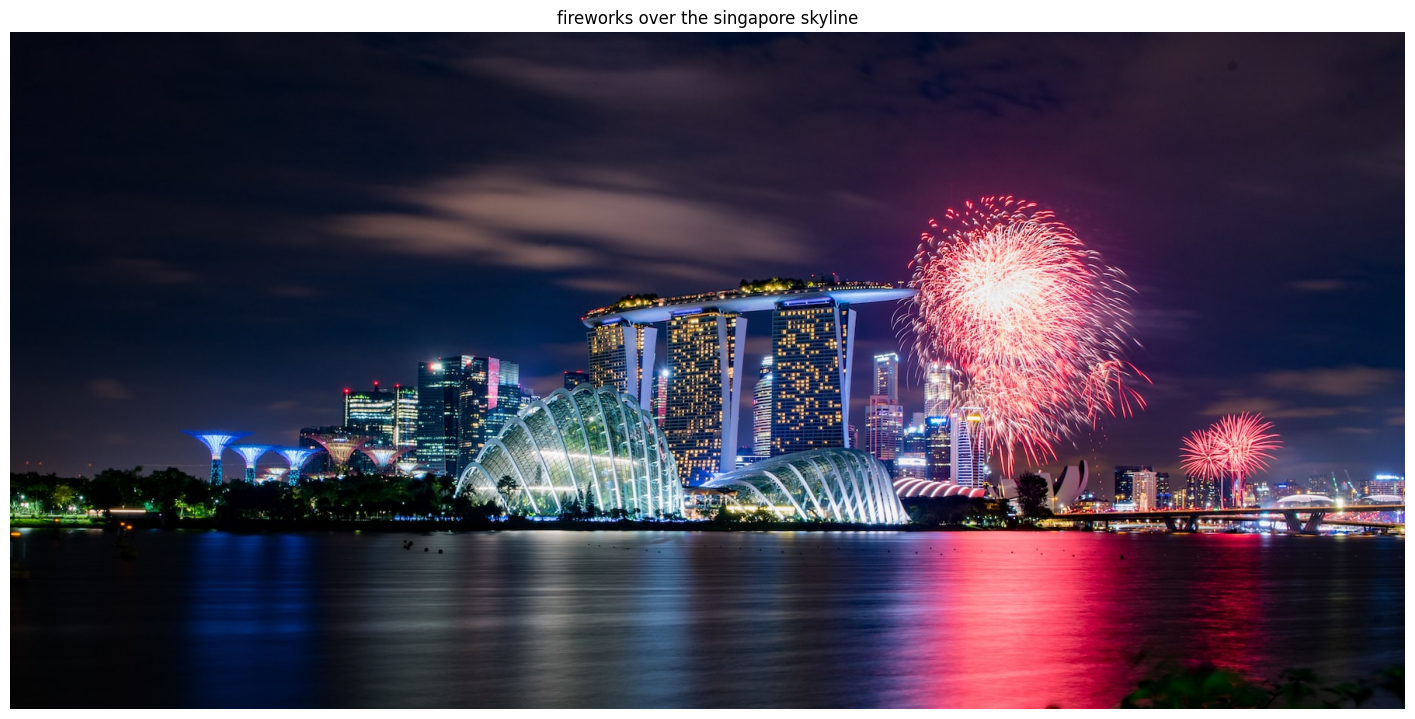

In [14]:
# test with image not in the dataset, from URL

# image of Singapore (fireworks)
new_image_url = "https://images.unsplash.com/photo-1530423316264-2b8b006f7d63?q=80&w=1796&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

new_image = Image.open(requests.get(new_image_url, stream=True).raw).convert('RGB')
get_caption(new_image)

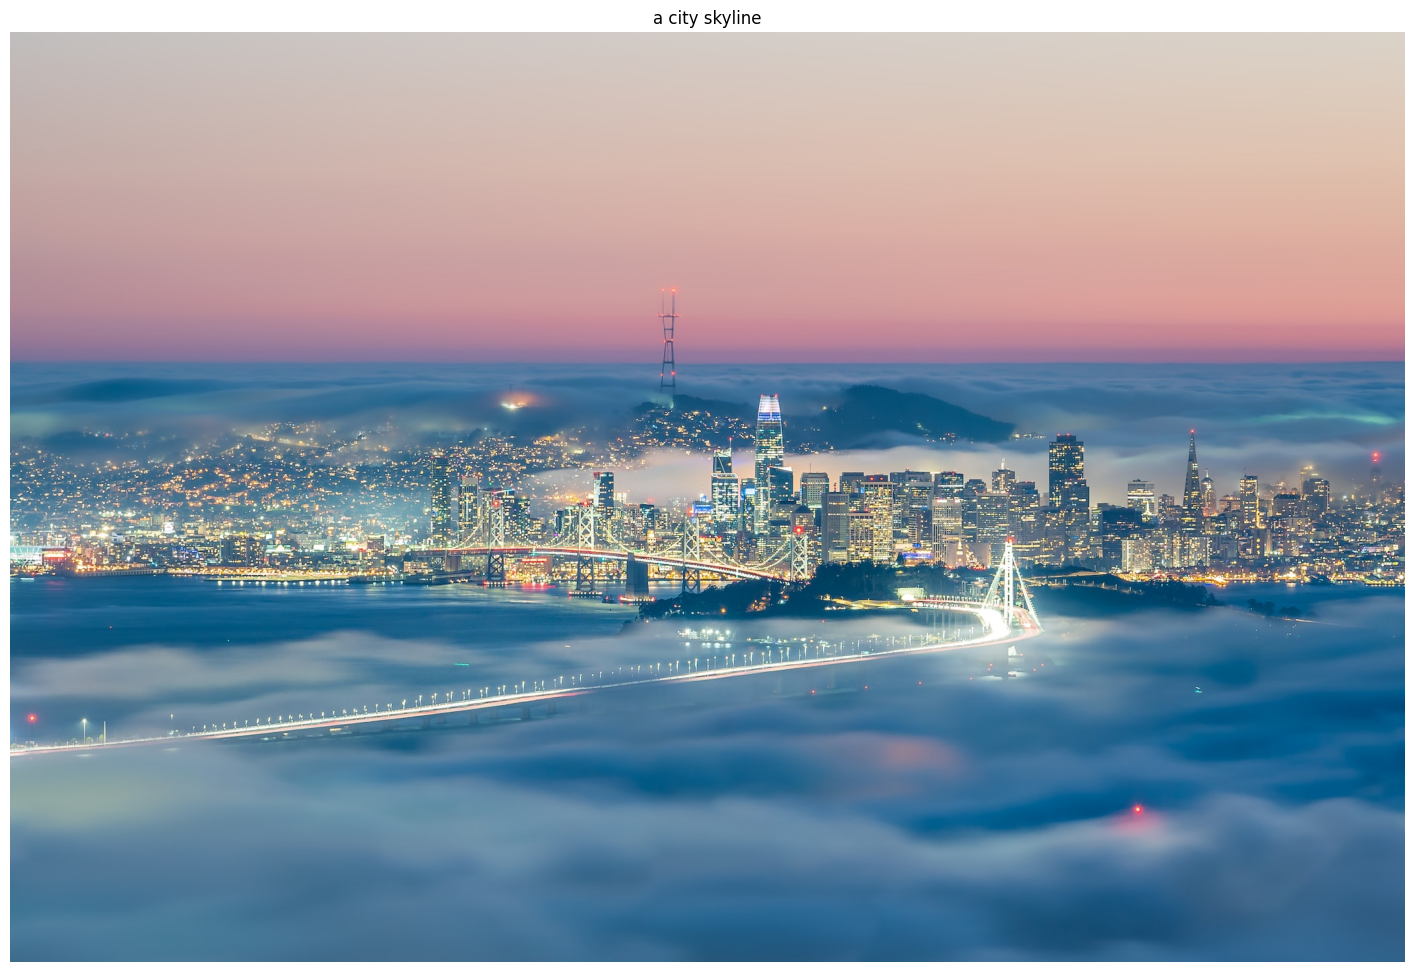

In [15]:
# test with image not in the dataset, from URL

# image of San Francisco (fog)
new_image_url = "https://images.unsplash.com/photo-1683695948101-fd31df8697b5?q=80&w=2071&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

new_image = Image.open(requests.get(new_image_url, stream=True).raw).convert('RGB')
get_caption(new_image)